<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/wiener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wiener Process & Brownian Motion**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Wiener Process**

* Wiener process is a real valued continuous-time stochastic process
* It is one of the best known Lévy processes (càdlàg stochastic processes with stationary independent increments)
* Wiener process gave rise to the study of continuous time martingales
* The Wiener process is used to represent the integral of a white noise Gaussian process

**Applications**

* In physics it is used to study Brownian motion, the diffusion of minute particles suspended in fluid, and other types of diffusion via the Fokker–Planck and Langevin equations. 
* It also forms the basis for the rigorous path integral formulation of quantum mechanics (by the Feynman–Kac formula, a solution to the Schrödinger equation can be represented in terms of the Wiener process) and the study of eternal inflation in physical cosmology. 
* It is also prominent in the mathematical theory of finance, in particular the Black–Scholes option pricing model.

**Wiener Process & Brownian Motion**

* A Wiener process is a stochastic process with **similar behavior to Brownian motion**, the physical phenomenon of a minute particle diffusing in a fluid.
* Sometimes the Wiener process is called "Brownian motion", although this is strictly speaking a confusion of a model with the phenomenon being modeled.

**Wiener Process & Random Walk**

* **A Wiener process is the scaling limit of random walk in dimension 1**. This means that if you take a random walk with very small steps, you get an approximation to a Wiener process (and, less accurately, to Brownian motion).
* To be more precise, if the step size is ε, one needs to take a walk of length L/ε2 to approximate a Wiener length of L. As the step size tends to 0 (and the number of steps increases proportionally), **random walk converges to a Wiener process** in an appropriate sense. Formally, if B is the space of all paths of length L with the maximum topology, and if M is the space of measure over B with the norm topology, then the convergence is in the space M. Similarly, a Wiener process in several dimensions is the scaling limit of random walk in the same number of dimensions.
* A random walk is a discrete fractal (a function with integer dimensions; 1, 2, ...), but a **Wiener process trajectory is a true fractal**, and there is a connection between the two (a Wiener process walk is a fractal of Hausdorff dimension 2). 
* A **Wiener process enjoys many symmetries random walk does not**. For example, a **Wiener process walk is invariant to rotations, but the random walk is not**, since the underlying grid is not (random walk is invariant to rotations by 90 degrees, but Wiener processes are invariant to rotations by, for example, 17 degrees too). This means that in many cases, problems on a random walk are easier to solve by translating them to a Wiener process, solving the problem there, and then translating back. 
* Random walk and Wiener process can be coupled, namely manifested on the **same probability space in a dependent way that forces them to be quite close**. The simplest such coupling is the Skorokhod embedding, but there exist more precise couplings, such as Komlós–Major–Tusnády approximation theorem.
* The **convergence of a random walk toward the Wiener process is controlled by the central limit theorem**, and by Donsker's theorem. For a particle in a known fixed position at t = 0, the central limit theorem tells us that after a large number of independent steps in the random walk, the walker's position is distributed according to a normal distribution of total variance. The Green's function of the diffusion equation that controls the Wiener process, suggests that, **after a large number of steps, the random walk converges toward a Wiener process**.



## **Simulating a Wiener Process**

Simulate the Wiener process and plot the paths attempting to gain an intuitive understanding of a stochastic process. Each path is an independent Wiener process [Source](https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method)



Populating the interactive namespace from numpy and matplotlib


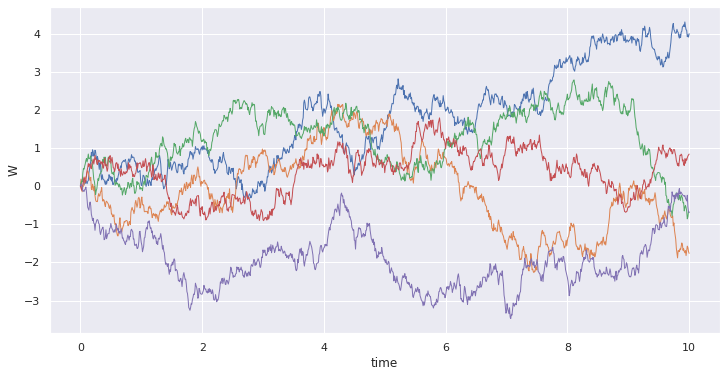

In [10]:
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 10), "lines.linewidth": 1.0})
%pylab inline
def wiener_process(T, N):
    """
    T: total time
    N: The total number of steps
    """
    W0 = [0]
    dt = T/float(N)
    # simulate the increments by normal random variable generator
    increments = np.random.normal(0, 1*np.sqrt(dt), N)
    W = W0 + list(np.cumsum(increments))
    return W

N = 1000
T = 10
dt = T / float(N)
t = np.linspace(0.0, N*dt, N+1)
plt.figure(figsize=(12,6))
for i in range(5):
    W = wiener_process(T, N)
    plt.plot(t, W)
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)

## **Create Random Walk (with Drift)**

**1D Random Walk as Time Series**

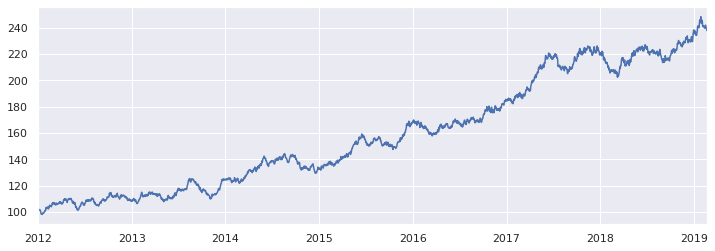

In [0]:
sns.set(rc={'figure.figsize':(12, 4)})

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20): 
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

randomwalk.plot()